In [1]:

#You need to compile braina.mod and bodya.mod first using nrnivmodl
#This script is part of doing the following tasks:
# 1. Numerically vary gfb (the feedback conductance). Currently in brain.mod, gfb is  set to 0.001. Try varying it and see if you can get an increase in Q. Can you  nd an
#optimum?
#2. Numerically vary gsyn (the synaptic conductance). Currently in brain.mod, gsyn is set to 0.005. Try varying it and see if you can get an increase in Q. Can you  nd an optimum?
#3. See if you can improve Q by varying both gfb and gsyn. Can you  nd an optimum for varying them both together?



from neuron import h
import numpy as np
import matplotlib.pyplot as plt

h.load_file('stdrun.hoc')
T=3055
simdur =4*T

def performance(gfb, gsyn):
    sec = h.Section(name='mod')
    sec.insert('braina')
    sec.insert('bodya')
    seg = sec(0.5)

    seg.braina.gfb  = gfb
    seg.braina.gsyn = gsyn
    seg.braina._ref_L1Pointer = seg.bodya._ref_L1
    seg.braina._ref_L2Pointer = seg.bodya._ref_L2
    seg.bodya._ref_V1Pointer = seg.braina._ref_V1
    seg.bodya._ref_V2Pointer = seg.braina._ref_V2


    Qv = h.Vector().record(seg.bodya._ref_Q)
    tv = h.Vector().record(h._ref_t)

    h.finitialize()
    h.cvode.active(1)
    h.continuerun(simdur)

    Q = np.array(Qv)
    return Q[-1] / simdur
original_gfb = 0.001
original_gsyn = 0.005
original_Q = performance(original_gfb, original_gsyn)
print(f"\nOriginal performance with gfb={original_gfb} and gsyn={original_gsyn}: Performance= {original_Q:.6e}\n")


Original performance with gfb=0.001 and gsyn=0.005: Performance= 1.230890e-03



gfb=0.000050, Performance=0.001438
gfb=0.000253, Performance=0.001438
gfb=0.000456, Performance=0.001405
gfb=0.000659, Performance=0.001339
gfb=0.000862, Performance=0.001272
gfb=0.001065, Performance=0.001236
gfb=0.001268, Performance=0.001252
gfb=0.001471, Performance=0.001267
gfb=0.001674, Performance=0.001282
gfb=0.001878, Performance=0.001294
gfb=0.002081, Performance=0.001273
gfb=0.002284, Performance=0.001226
gfb=0.002487, Performance=0.001160
gfb=0.002690, Performance=0.001083
gfb=0.002893, Performance=0.001009
gfb=0.003096, Performance=0.000952
gfb=0.003299, Performance=0.000922
gfb=0.003502, Performance=0.000905
gfb=0.003705, Performance=0.000876
gfb=0.003908, Performance=0.000827
gfb=0.004111, Performance=0.000743
gfb=0.004314, Performance=0.000671
gfb=0.004517, Performance=0.000622
gfb=0.004720, Performance=0.000581
gfb=0.004923, Performance=0.000544
gfb=0.005127, Performance=0.000511
gfb=0.005330, Performance=0.000479
gfb=0.005533, Performance=0.000450
gfb=0.005736, Perfor

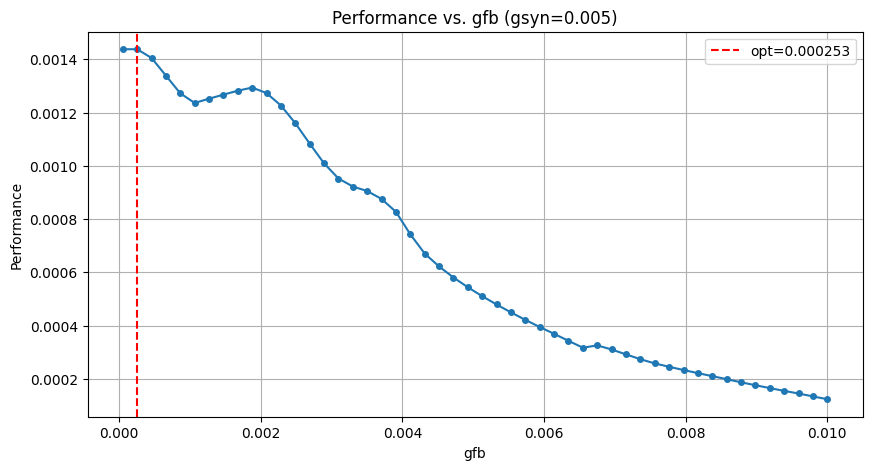

In [2]:
# gfb with extended range
gfb_vals = np.linspace(0.00005, 0.01, 50)  
Q_gfb = []
for g in gfb_vals:
    Q = performance(g, 0.005)
    Q_gfb.append(Q)
    print(f"gfb={g:.6f}, Performance={Q:.6f}")

opt_i = np.argmax(Q_gfb)
print(f"\n→ Optimum gfb = {gfb_vals[opt_i]:.6f}, Performance = {Q_gfb[opt_i]:.6e}")

plt.figure(figsize=(10, 5))
plt.plot(gfb_vals, Q_gfb, '-o', markersize=4)
plt.axvline(gfb_vals[opt_i], color='red', linestyle='--', 
            label=f"opt={gfb_vals[opt_i]:.6f}")
plt.xlabel('gfb')
plt.ylabel('Performance')
plt.title('Performance vs. gfb (gsyn=0.005)')
plt.grid(True)
plt.legend()
plt.show()

gsyn=0.001000, Performance=0.001133
gsyn=0.001592, Performance=0.001175
gsyn=0.002184, Performance=0.001323
gsyn=0.002776, Performance=0.001303
gsyn=0.003367, Performance=0.001349
gsyn=0.003959, Performance=0.001415
gsyn=0.004551, Performance=0.001352
gsyn=0.005143, Performance=0.001244
gsyn=0.005735, Performance=0.001295
gsyn=0.006327, Performance=0.001286
gsyn=0.006918, Performance=0.001120
gsyn=0.007510, Performance=0.001036
gsyn=0.008102, Performance=0.001042
gsyn=0.008694, Performance=0.001043
gsyn=0.009286, Performance=0.001042
gsyn=0.009878, Performance=0.001039
gsyn=0.010469, Performance=0.001041
gsyn=0.011061, Performance=0.001039
gsyn=0.011653, Performance=0.001033
gsyn=0.012245, Performance=0.001024
gsyn=0.012837, Performance=0.000808
gsyn=0.013429, Performance=0.000781
gsyn=0.014020, Performance=0.000745
gsyn=0.014612, Performance=0.000717
gsyn=0.015204, Performance=0.000694
gsyn=0.015796, Performance=0.000695
gsyn=0.016388, Performance=0.000695
gsyn=0.016980, Performance=0

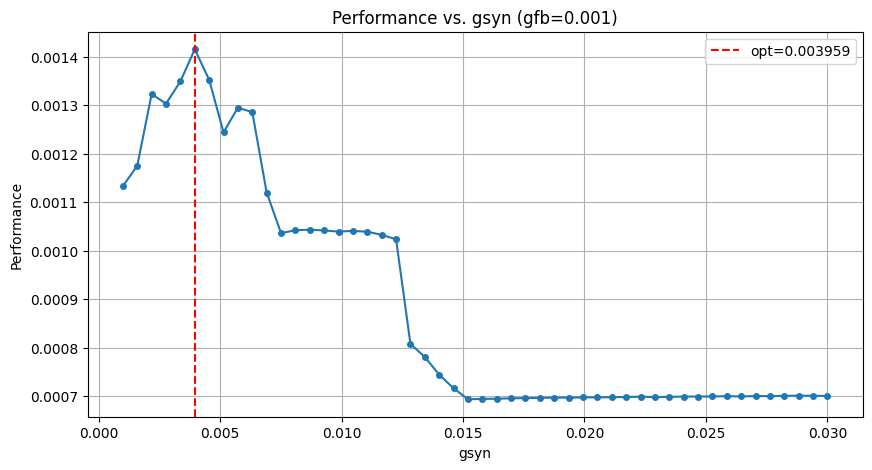

In [3]:
#  gsyn with extended range
gsyn_vals = np.linspace(0.001, 0.03, 50)  
Q_gsyn = []
for g in gsyn_vals:
    Q = performance(0.001, g)
    Q_gsyn.append(Q)
    print(f"gsyn={g:.6f}, Performance={Q:.6f}")

opt_j = np.argmax(Q_gsyn)
print(f"\n Optimum gsyn = {gsyn_vals[opt_j]:.6f}, Performance = {Q_gsyn[opt_j]:.6e}")

plt.figure(figsize=(10, 5))
plt.plot(gsyn_vals, Q_gsyn, '-o', markersize=4)
plt.axvline(gsyn_vals[opt_j], color='red', linestyle='--',
            label=f"opt={gsyn_vals[opt_j]:.6f}")
plt.xlabel('gsyn')
plt.ylabel('Performance')
plt.title('Performance vs. gsyn (gfb=0.001)')
plt.grid(True)
plt.legend()
plt.show()

gfb=0.000500, gsyn=0.001000, Performance=0.000322
gfb=0.000500, gsyn=0.001569, Performance=0.001131
gfb=0.000500, gsyn=0.002137, Performance=0.001287
gfb=0.000500, gsyn=0.002706, Performance=0.001267
gfb=0.000500, gsyn=0.003274, Performance=0.001301
gfb=0.000500, gsyn=0.003843, Performance=0.001355
gfb=0.000500, gsyn=0.004411, Performance=0.001418
gfb=0.000500, gsyn=0.004980, Performance=0.001400
gfb=0.000500, gsyn=0.005548, Performance=0.001238
gfb=0.000500, gsyn=0.006117, Performance=0.001285
gfb=0.000500, gsyn=0.006685, Performance=0.001312
gfb=0.000500, gsyn=0.007254, Performance=0.001211
gfb=0.000500, gsyn=0.007822, Performance=0.001028
gfb=0.000500, gsyn=0.008391, Performance=0.001036
gfb=0.000500, gsyn=0.008959, Performance=0.001038
gfb=0.000625, gsyn=0.001000, Performance=0.000324
gfb=0.000625, gsyn=0.001569, Performance=0.001136
gfb=0.000625, gsyn=0.002137, Performance=0.001302
gfb=0.000625, gsyn=0.002706, Performance=0.001276
gfb=0.000625, gsyn=0.003274, Performance=0.001312


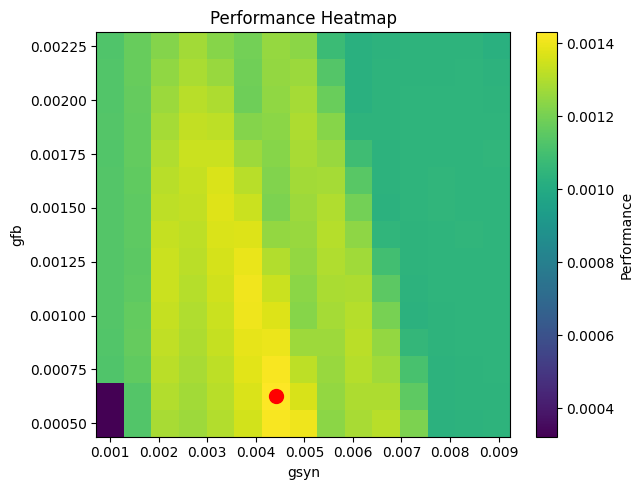

In [4]:
gfb_range = np.linspace(max(0.0005, gfb_vals[opt_i]-0.002), 
                       min(0.01, gfb_vals[opt_i]+0.002), 15)
gsyn_range = np.linspace(max(0.001, gsyn_vals[opt_j]-0.005),
                        min(0.03, gsyn_vals[opt_j]+0.005), 15)


P = np.zeros((len(gfb_range), len(gsyn_range)))
for i, gfb in enumerate(gfb_range):
    for j, gsyn in enumerate(gsyn_range):
        P[i,j] = performance(gfb, gsyn)
        print(f"gfb={gfb:.6f}, gsyn={gsyn:.6f}, Performance={P[i,j]:.6f}")

# joint optimum
i_opt, j_opt = np.unravel_index(P.argmax(), P.shape)
gfb_opt, gsyn_opt = gfb_range[i_opt], gsyn_range[j_opt]
print(f"\nJoint optimum (gfb, gsyn) = ({gfb_opt:.6f}, {gsyn_opt:.6f}), Performance= {P.max():.6e}")


plt.figure(figsize=(12, 5))

# Heatmap
plt.subplot(1, 2, 1)
pcm = plt.pcolormesh(gsyn_range, gfb_range, P,
                    shading='auto', cmap='viridis')
plt.colorbar(pcm, label='Performance')
plt.scatter(gsyn_opt, gfb_opt, c='red', s=100, 
            label=f'Optimum\n({gsyn_opt:.4f}, {gfb_opt:.4f})')
plt.xlabel('gsyn')
plt.ylabel('gfb')
plt.title('Performance Heatmap')


plt.tight_layout()
plt.show()


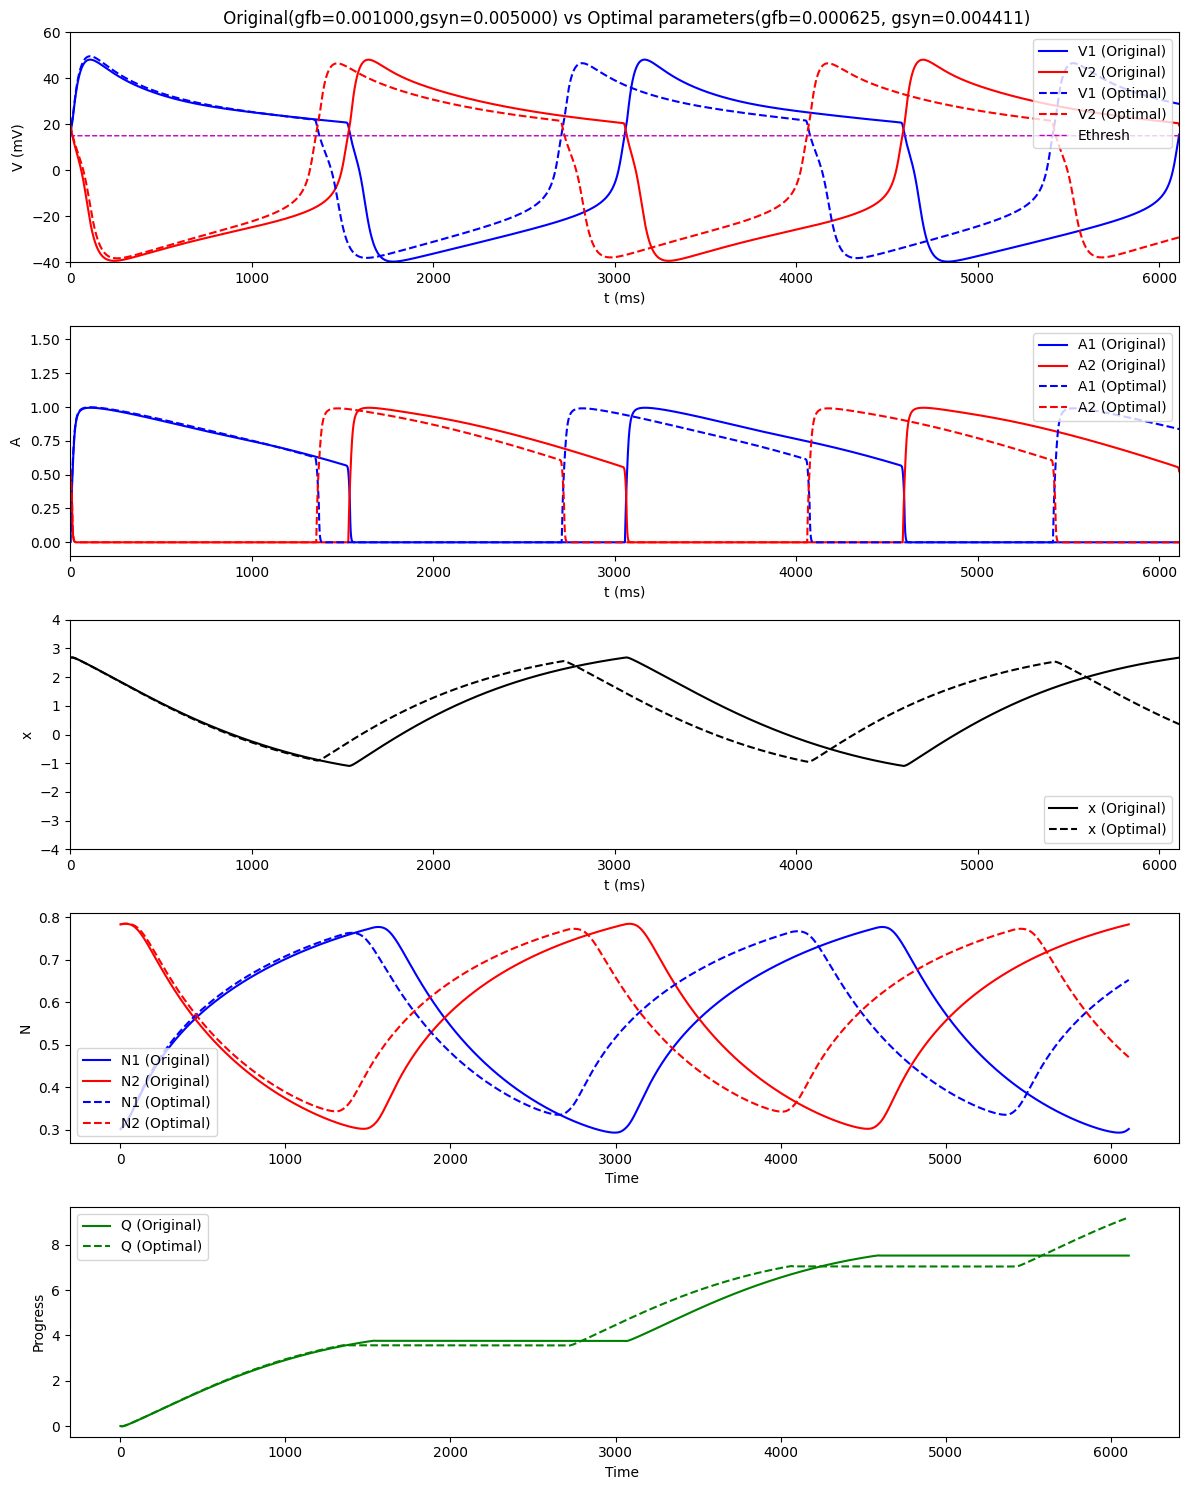

In [5]:
def solution(gfb, gsyn, label):

    model = h.Section(name='model')
    model.insert('braina')
    model.insert('bodya')
    seg = model(0.5)

    seg.braina.gfb = gfb
    seg.braina.gsyn = gsyn
    seg.braina._ref_L1Pointer = seg.bodya._ref_L1
    seg.braina._ref_L2Pointer = seg.bodya._ref_L2
    seg.bodya._ref_V1Pointer = seg.braina._ref_V1
    seg.bodya._ref_V2Pointer = seg.braina._ref_V2

    results = {
        'N1': h.Vector(),
        'N2': h.Vector(),
        'V1': h.Vector(),
        'V2': h.Vector(),
        'A1': h.Vector(),
        'A2': h.Vector(),
        'x': h.Vector(),
        'Q': h.Vector(),
        't': h.Vector(),
        'label': label
    }
    
   
    results['N1'].record(seg.braina._ref_N1)
    results['N2'].record(seg.braina._ref_N2)
    results['V1'].record(seg.braina._ref_V1)
    results['V2'].record(seg.braina._ref_V2)
    results['A1'].record(seg.bodya._ref_A1)
    results['A2'].record(seg.bodya._ref_A2)
    results['x'].record(seg.bodya._ref_x)
    results['Q'].record(seg.bodya._ref_Q)
    results['t'].record(h._ref_t)

   
    h.load_file('stdrun.hoc')
    h.init()
    h.cvode.active(0)  
    h.dt = 0.1        
    h.steps_per_ms = 10
    h.tstop = 2*T
    h.run()
    
    # Convert recorded vectors to numpy arrays
    for key in results:
        if key != 'label':
            results[key] = np.array(results[key])
    
    return results


original_results = solution(original_gfb, original_gsyn, "Original")
optimal_results = solution(gfb_opt, gsyn_opt, "Optimal")


plt.figure(figsize=(12, 15))


ax1 = plt.subplot(511)
ax1.plot(original_results['t'], original_results['V1'], 'b-',  label=f'V1 ({original_results["label"]})')
ax1.plot(original_results['t'], original_results['V2'], 'r-', label=f'V2 ({original_results["label"]})')
ax1.plot(optimal_results['t'], optimal_results['V1'], 'b--', linewidth=1.5, label=f'V1 ({optimal_results["label"]})')
ax1.plot(optimal_results['t'], optimal_results['V2'], 'r--', linewidth=1.5, label=f'V2 ({optimal_results["label"]})')
ax1.plot(optimal_results['t'], 15 * np.ones(len(optimal_results['t'])), '--m', linewidth=1, label='Ethresh')
ax1.axis([0, h.tstop, -40, 60])
ax1.set_xlabel('t (ms)')
ax1.set_ylabel('V (mV)')
ax1.legend(loc='upper right', frameon=True)
ax1.set_title(f' Original(gfb={original_gfb:.6f},gsyn={original_gsyn:.6f}) vs Optimal parameters(gfb={gfb_opt:.6f}, gsyn={gsyn_opt:.6f})')


ax2 = plt.subplot(512)
ax2.plot(original_results['t'], original_results['A1'], 'b-',  label=f'A1 ({original_results["label"]})')
ax2.plot(original_results['t'], original_results['A2'], 'r-',  label=f'A2 ({original_results["label"]})')
ax2.plot(optimal_results['t'], optimal_results['A1'], 'b--', linewidth=1.5, label=f'A1 ({optimal_results["label"]})')
ax2.plot(optimal_results['t'], optimal_results['A2'], 'r--', linewidth=1.5, label=f'A2 ({optimal_results["label"]})')
ax2.axis([0, h.tstop, -0.1, 1.6])
ax2.set_xlabel('t (ms)')
ax2.set_ylabel('A')
ax2.legend(loc='upper right', frameon=True)


ax3 = plt.subplot(513)
ax3.plot(original_results['t'], original_results['x'], 'k-',  label=f'x ({original_results["label"]})')
ax3.plot(optimal_results['t'], optimal_results['x'], 'k--', linewidth=1.5, label=f'x ({optimal_results["label"]})')
ax3.axis([0, h.tstop, -4, 4])
ax3.set_xlabel('t (ms)')
ax3.set_ylabel('x')
ax3.legend(loc='lower right', frameon=True)


ax4 = plt.subplot(514)
ax4.plot(original_results['t'], original_results['N1'], 'b-',  label=f'N1 ({original_results["label"]})')
ax4.plot(original_results['t'], original_results['N2'], 'r-',  label=f'N2 ({original_results["label"]})')
ax4.plot(optimal_results['t'], optimal_results['N1'], 'b--', linewidth=1.5, label=f'N1 ({optimal_results["label"]})')
ax4.plot(optimal_results['t'], optimal_results['N2'], 'r--', linewidth=1.5, label=f'N2 ({optimal_results["label"]})')
ax4.set_xlabel('Time ')
ax4.set_ylabel('N')
ax4.legend()


ax5 = plt.subplot(515)
ax5.plot(original_results['t'], original_results['Q'], 'g-',  label=f'Q ({original_results["label"]})')
ax5.plot(optimal_results['t'], optimal_results['Q'], 'g--', linewidth=1.5, label=f'Q ({optimal_results["label"]})')
ax5.set_xlabel('Time ')
ax5.set_ylabel('Progress')
ax5.legend()

plt.tight_layout()  
plt.show()